# Numpy e Matplotlib: Soluzioni

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<br><br><br>
**Esercizio \[\*\]:** Una volta assegnato un valore intero a $N$:
- creare un dizionario vuoto *Dimensioni*
- aggiungere a *Dimensioni* un vettore di $N$ interi casuali da 5 a 20, usando la chiave *altezza* 
- aggiungere a *Dimensioni* un vettore di $N$ interi casuali da 3 a 10, usando la chiave *larghezza*
- aggiungere a *Dimensioni* un vettore di aree calcolate a partire dalle dimensioni inserite nei punti precedenti, usando la chiave *area* 
- Calcolare la media e la mediana delle aree presenti in *Dimensione* 

In [2]:
N = 100
Dimensioni = {}
Dimensioni["altezza"] = np.random.randint(5,21,N)
Dimensioni["larghezza"] = np.random.randint(3,11,N)
Dimensioni["area"] = Dimensioni["altezza"] * Dimensioni["larghezza"]

print("Area media:",Dimensioni["area"].mean())
print("Area mediana:", np.median(Dimensioni["area"]))

Area media: 87.72
Area mediana: 80.0


<br><br><br>
**Esercizio \[\*\]**<br>
Scrivere una funzione *testaocroce(N)* che simuli $N$ lanci di moneta (1 = Testa, 0 = Croce) restituendo un array con $N$ risultati<br>
 
**Bonus! \[\*\*\]**: Calcolare la frequenza con cui è uscita Croce su diversi tentativi, aumentando il valore di $N$<br>

**Jackpot! \[\*\*\*\]:** Generalizzare la funzione **comprendendo lanci di monete truccate** (la probabilità che esca Testa $P$ deve essere un input)<br>
*Suggerimento 1:* **np.RANDOM.RAND(N)** restituisce un array di $N$ valori presi casualmente e *uniformemente* tra $[0,1)$<br>
*Suggerimento 2:* **True\*1 = 1**; **False\*1 = 0**


In [3]:
def testaocroce(N):
    out = np.random.randint(0,2,N)
    return out

N = 10
v = testaocroce(N)
print(v)

[0 1 0 1 0 0 1 1 0 0]


In [4]:
N = 10000
v = testaocroce(N)
print("Frequenza CROCE:",1-v.mean())

Frequenza CROCE: 0.49339999999999995


In [5]:
def testaocroce2(N,P):
    out = np.random.rand(N)
    return (out<=P)*1 # vedi esercizio testfrequenza

N = 10000
v = testaocroce2(N,0.70)
print("Frequenza CROCE:",1-v.mean())

Frequenza CROCE: 0.2944


<br><br><br>
**Esercizio \[\*\*\] - Magie Matematiche: 17 è un numero fortunato!**<br>

Creare un vettore di 10000 numeri interi casuali da 1 a 10<br> 
Per ogni numero estratto, impostare la seguente *magia matematica*:

- moltiplicare il numero estratto per 9
- sommare le decine e le unità del numero ottenuto
- sommare 8

Controllare che **per tutti i numeri casuali iniziali** il risultato finale dia **17**

*Suggerimento* **np.FLOOR(f)** restituisce la parte intera di $f$. 

In [6]:
n = 10000
v0 = np.random.randint(1,11,n)
v1 = v0*9
v2 = np.floor(v1/10) + (v1-np.floor(v1/10)*10)
v3 = v2 + 8
v4 = (v3 == 17)

v4.all()

True

In [7]:
# in versione compatta e poco leggibile:
n = 10000
v0 = np.random.randint(1,11,n)
((np.floor(v0*9/10) + (v0*9 - np.floor(v0*9/10)*10) + 8) == 17).all()

True

**Esercizio \[\*\]** da un vettore di $N$ numeri casuali interi tra 1 e 20 (compreso) estrapolare un sotto-array formato da numeri compresi tra 5 e 10 (compresi)

In [8]:
N = 10
v = np.random.randint(1,21,N)
v[(v>=5)&(v<=10)]

array([10,  9])

<br><br><br>
**Esercizio \[\*\*\]** *testfrequenza(N,T)* con $N$ numero intero (*grande*) e con $T$ un numero compreso tra $[0,1]$, è una funzione che simula un vettore di $N$ numeri casuali tra 0 e 1 e **restituisce la frequenza con cui sono usciti numeri minori di $T$**

In [9]:
def testfrequenza(N,T):
    out = np.random.rand(N)
    return ((out<T)*1).mean()

N = 100000
T = 0.7
testfrequenza(N,T)

# l'output è sempre molto vicino a T per valori di N molto grandi.
# questo vuol dire che (out<T)*1 restituisce un vettori di 1 e 0 
# con un percentuale T*100% di 1.

# Nota: ottimo da usare per l'esercizio testaocroce versione truccata


0.69945

<br><br><br>
**Esercizio \[\*\]** Implementare una funzione *Istogramma(V,B)* che prendendo in pasto un vettore di valori $V$ e un numero di bin $B$ metta a schermo un istogramma di $V$ con $B$ bins, **usando un bar plot**

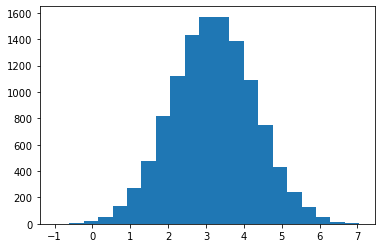

In [10]:
def Istrogramma(V,B):
    edges = np.linspace(V.min(), V.max(), B+1)
    values = []
    for i in range(edges.size-1):
        values.append(np.sum((V>=edges[i]) & (V<edges[i+1])))
    plt.bar(edges[1:],np.array(values))
    return

V = np.random.randn(10000) + 3
B = 20
Istrogramma(V,B)

<br><br><br>
**Esercizio \[\*\]** Generare due array casuali da una normale standard e creare un plot 2x2 che comprenda:
- uno scatterplot centrale
- un istogramma sopra lo scatterplot per il vettore alla coordinata x
- un istogramma a destra dello scatterplot per il vettore alla coordinata y

**Bonus!\[\*\*\]** Orientare l'istogramma a sinistra in maniera tale che sia orizzontale con la base vicina all'asse y 

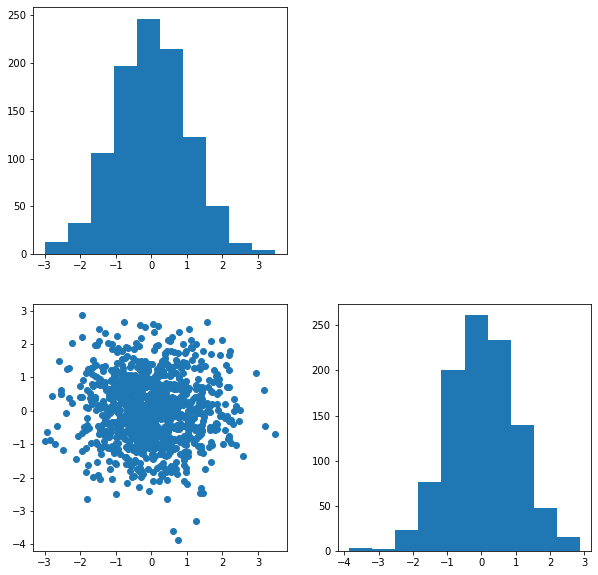

In [11]:
x = np.random.randn(1000)
y = np.random.randn(1000)

fig = plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.hist(x)
plt.subplot(2,2,4)
plt.hist(y)
plt.subplot(2,2,3)
plt.scatter(x,y)
plt.show()

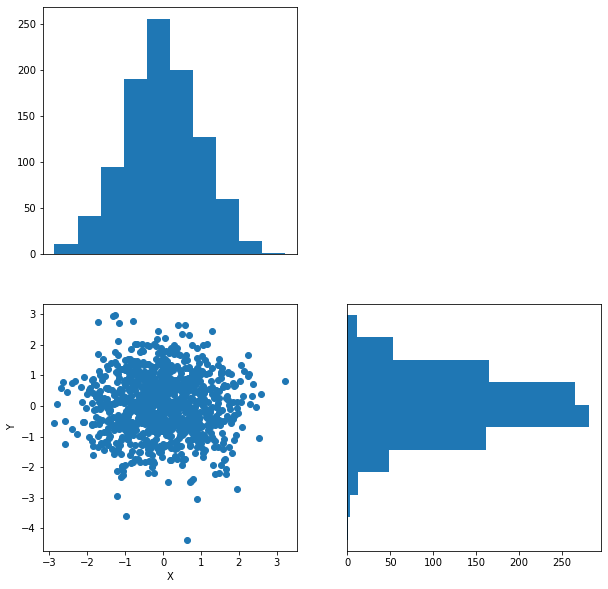

In [12]:
x = np.random.randn(1000)
y = np.random.randn(1000)

fig = plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.hist(x)
plt.xticks([])
plt.subplot(2,2,4)
plt.hist(y, orientation = "horizontal")
plt.yticks([])
plt.subplot(2,2,3)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()